Example of a IR system.  Pretty much from scratch.  Feel free to skip this first code if you understand how dictionaries work-- they will be at the heart of the code here.

In [ ]:
example_dict = {'one': 1, 'two': 2, 'three': 3}
print("The value for key 'one' is", example_dict.get('one'))
# Or, you can also do this
print("The key for value a is", example_dict['one'])


The value for key 'one' is 1
The key for value a is 1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('punkt')

# Load the first Excel file (news-pal.xlsx)
url_pal = "https://github.com/rosenfa/ai/blob/master/news-pal.xlsx?raw=true"
df_pal = pd.read_excel(url_pal)

# Load the second Excel file (news-israel.xlsx)
url_israel = "https://github.com/rosenfa/ai/blob/master/news-israel.xlsx?raw=true"
df_israel = pd.read_excel(url_israel)

df_israel.dropna(inplace=True)
df_pal.dropna(inplace=True)


# Add a 'target' column to both dataframes
df_pal['target'] = False  # Assuming 'false' for news-pal.xlsx
df_israel['target'] = True   # Assuming 'true' for news-israel.xlsx


israel_texts = df_israel['Content'].to_list()
pal_texts = df_pal['Content'].to_list()
texts = israel_texts+pal_texts
print(texts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['"06:30," a documentary project filmed in Tel Aviv last week, will recreate the horrors of the Hamas massacre in southern Israel on October 7 through miniature sets and the testimonies of 10 survivors', '"Fourteen residents of Kibbutz Nahal Oz were murdered, 20 are still missing, and five, including my  brother-in-law are confirmed as hostages".Moshe Emilio Lavi addresses congressmen at the the Capitol. #ICYMI | @IsraelAllies', '"Releasing the hostages is the supreme task. That’s the most important goal, and politicians aren’t allowed to engage in political manipulation on this matter," Hagai Hadas, Israel\'s former coordinator for hostages and missing persons, says', '"Unorthodox" author @Deborah_Feldman has been a vocal critic of Israel in Germany, sparking debate in a country that has been very sensitive to perceptions of antisemitism since the Holocaust.#Unorthodox | #Germany | #Israel', '"We will have to make difficult decisions in the coming days - defeat Hamas step by step and 

Now onto the NLP stuff.  We'll introduce the stemmer and word vectorizer-- just like we did for the text mining unit. First, let's look at the stemming again:

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
"""
texts  = ['she did not sing but he is singing',
          'game gaming gamed games',
          'bag bagging bags bagged bagguette',
          'His smile was not perfect',
          'His smile was not not not not perfected',
          ]
"""




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"\ntexts  = ['she did not sing but he is singing',\n          'game gaming gamed games',\n          'bag bagging bags bagged bagguette',\n          'His smile was not perfect',\n          'His smile was not not not not perfected',\n          ]\n"

In order to properly stem word, you need to parse them into individual words away from the sentence. Otherwise, unfortunately this won't work properly:

In [ ]:
print("The texts are: ", texts)
ps = PorterStemmer()
txt1=[]
print("Bad Stemming")
for word in texts:
    #print(ps.stem(word))
    txt1.append(ps.stem(word))
print(txt1)

The texts are:  ['"06:30," a documentary project filmed in Tel Aviv last week, will recreate the horrors of the Hamas massacre in southern Israel on October 7 through miniature sets and the testimonies of 10 survivors', '"Fourteen residents of Kibbutz Nahal Oz were murdered, 20 are still missing, and five, including my  brother-in-law are confirmed as hostages".Moshe Emilio Lavi addresses congressmen at the the Capitol. #ICYMI | @IsraelAllies', '"Releasing the hostages is the supreme task. That’s the most important goal, and politicians aren’t allowed to engage in political manipulation on this matter," Hagai Hadas, Israel\'s former coordinator for hostages and missing persons, says', '"Unorthodox" author @Deborah_Feldman has been a vocal critic of Israel in Germany, sparking debate in a country that has been very sensitive to perceptions of antisemitism since the Holocaust.#Unorthodox | #Germany | #Israel', '"We will have to make difficult decisions in the coming days - defeat Hamas s

In [ ]:
print("Proper Stemming")
def stemSentence(sentence, stemmer_type):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer_type.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

temp=stemSentence(texts[0],ps)
print("The properly stemmed first sentence is " , temp)

Proper Stemming
The properly stemmed first sentence is  `` 06:30 , '' a documentari project film in tel aviv last week , will recreat the horror of the hama massacr in southern israel on octob 7 through miniatur set and the testimoni of 10 survivor 


In [ ]:
new_text=[]

for line in texts:
    stem_sentence=stemSentence(line,ps)
    new_text.append(stem_sentence)
print(new_text)

["`` 06:30 , '' a documentari project film in tel aviv last week , will recreat the horror of the hama massacr in southern israel on octob 7 through miniatur set and the testimoni of 10 survivor ", "`` fourteen resid of kibbutz nahal oz were murder , 20 are still miss , and five , includ my brother-in-law are confirm as hostag '' .mosh emilio lavi address congressmen at the the capitol . # icymi | @ israel ", "`` releas the hostag is the suprem task . that ’ s the most import goal , and politician aren ’ t allow to engag in polit manipul on thi matter , '' hagai hada , israel 's former coordin for hostag and miss person , say ", "`` unorthodox '' author @ deborah_feldman ha been a vocal critic of israel in germani , spark debat in a countri that ha been veri sensit to percept of antisemit sinc the holocaust. # unorthodox | # germani | # israel ", "`` we will have to make difficult decis in the come day - defeat hama step by step and bring back the hostag , '' defens minist gallant said

Now onto creating the word vectors:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# counting words
print("Word Counts with CountVectorizer")
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
#vectorizer.fit(txt1)
vectorizer.fit(new_text)
# Print the learned corpus vocabulary
print(vectorizer.vocabulary_)
# encode document, this creates the counts
#vector = vectorizer.transform(txt1)
vector = vectorizer.transform(new_text)
# Print the count matrix
countMatrix = vector.toarray()
print(vector.toarray())

# the place of a word in the dictionary'
print("The value of the place for the word sing is", vectorizer.vocabulary_.get("sing"))
print("The value of the place for the word singing is", vectorizer.vocabulary_.get("singing"))

for i in range(3):
    print("the count for did in doc ", i, " is ", countMatrix[i][vectorizer.vocabulary_.get("did")])
    print("the count for bag in doc ", i, " is ", countMatrix[i][vectorizer.vocabulary_.get("bag")])


Word Counts with CountVectorizer
{'06': 2, '30': 67, 'documentari': 1124, 'project': 2706, 'film': 1408, 'in': 1804, 'tel': 3361, 'aviv': 420, 'last': 2056, 'week': 3671, 'will': 3702, 'recreat': 2819, 'the': 3393, 'horror': 1728, 'of': 2447, 'hama': 1611, 'massacr': 2202, 'southern': 3193, 'israel': 1905, 'on': 2471, 'octob': 2442, 'through': 3418, 'miniatur': 2259, 'set': 3040, 'and': 313, 'testimoni': 3381, '10': 4, 'survivor': 3306, 'fourteen': 1458, 'resid': 2872, 'kibbutz': 2006, 'nahal': 2346, 'oz': 2532, 'were': 3679, 'murder': 2331, '20': 39, 'are': 359, 'still': 3247, 'miss': 2270, 'five': 1423, 'includ': 1811, 'my': 2339, 'brother': 620, 'law': 2067, 'confirm': 830, 'as': 382, 'hostag': 1734, 'mosh': 2304, 'emilio': 1212, 'lavi': 2064, 'address': 193, 'congressmen': 839, 'at': 398, 'capitol': 670, 'icymi': 1766, 'releas': 2844, 'is': 1895, 'suprem': 3293, 'task': 3347, 'that': 3392, 'most': 2308, 'import': 1798, 'goal': 1537, 'politician': 2641, 'aren': 361, 'allow': 276, 't

Now onto creating more complicated vectors like TF/IDF

In [ ]:
# Word Frequencies with TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# without smoothing, smooth_idf=False
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(new_text)
txt_transformed = txt_fitted.transform(new_text)
print ("\nThe text: ", new_text)

# IDF: The inverse document frequency
idf = tf.idf_
print("\n Idf with names of terms:")
idf_dict = dict(zip(txt_fitted.get_feature_names_out(), idf))
print(idf_dict)

print("the idf for not is ", idf_dict.get('not'))
print("the idf for sing is ", idf_dict.get('sing'))

# tf-idf
tf_idf_array = txt_transformed.toarray()
print("\n tf-idf for each of the documents", tf_idf_array)

for i in range(len(new_text)):
    print("The count for not in doc ", i, " is ", countMatrix[i][vectorizer.vocabulary_.get("not")], " and the tf_idf is ", tf_idf_array[i][vectorizer.vocabulary_.get("not")])
    print("The count for sing in doc ", i, " is ", countMatrix[i][vectorizer.vocabulary_.get("sing")], " the tf_idf for sing in doc ", i, " is ", tf_idf_array[i][vectorizer.vocabulary_.get("sing")])


The text:  ["`` 06:30 , '' a documentari project film in tel aviv last week , will recreat the horror of the hama massacr in southern israel on octob 7 through miniatur set and the testimoni of 10 survivor ", "`` fourteen resid of kibbutz nahal oz were murder , 20 are still miss , and five , includ my brother-in-law are confirm as hostag '' .mosh emilio lavi address congressmen at the the capitol . # icymi | @ israel ", "`` releas the hostag is the suprem task . that ’ s the most import goal , and politician aren ’ t allow to engag in polit manipul on thi matter , '' hagai hada , israel 's former coordin for hostag and miss person , say ", "`` unorthodox '' author @ deborah_feldman ha been a vocal critic of israel in germani , spark debat in a countri that ha been veri sensit to percept of antisemit sinc the holocaust. # unorthodox | # germani | # israel ", "`` we will have to make difficult decis in the come day - defeat hama step by step and bring back the hostag , '' defens minist 

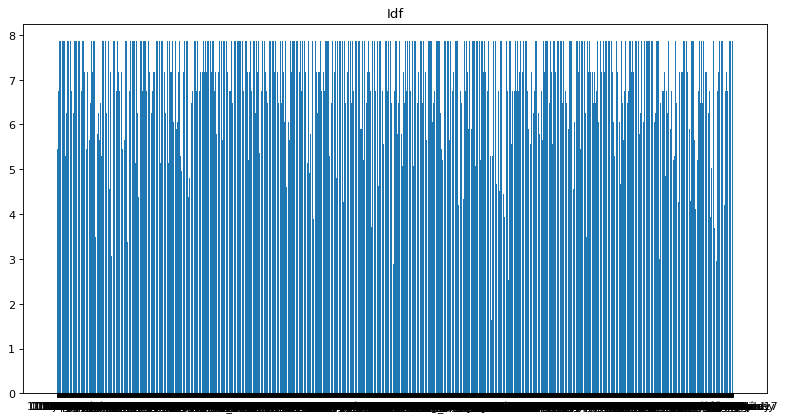

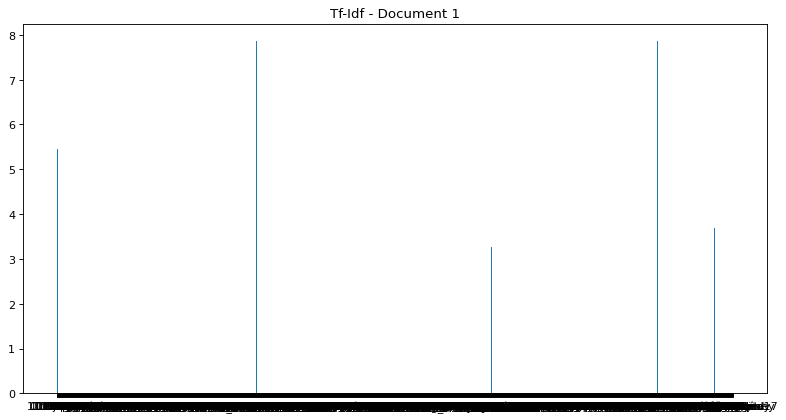

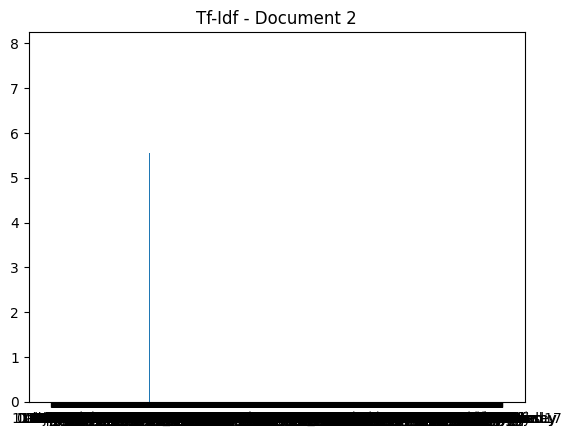

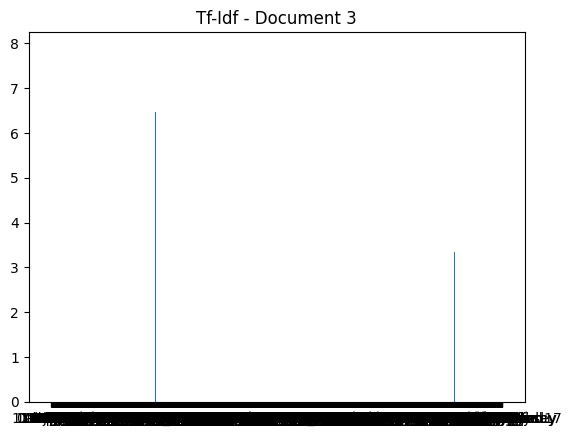

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# graphing idf
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(txt_fitted.get_feature_names_out(), idf)
plt.title('Idf')
plt.show()

# graphing idf
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(txt_fitted.get_feature_names_out(), tf_idf_array[0])
plt.title('Tf-Idf - Document 1')
plt.show()

plt.bar(txt_fitted.get_feature_names_out(), tf_idf_array[1])
plt.title('Tf-Idf - Document 2')
plt.show()

plt.bar(txt_fitted.get_feature_names_out(), tf_idf_array[2])
plt.title('Tf-Idf - Document 3')
plt.show()




Analysis of TF/IDF values:

In [ ]:
import numpy as np
feature_names = np.array(tf.get_feature_names_out())
sorted_by_idf = np.argsort(tf.idf_)
print("Feature with the lowest idf:\n{}".format(
    feature_names[sorted_by_idf[0]]))

print("Features with lowest idf:\n{}".format(
    feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
    feature_names[sorted_by_idf[-100:]]))

sorted_by_idf = np.argsort(tf.idf_)
print("Feature with the lowest idf:\n{}".format(
    feature_names[sorted_by_idf[0]]))

Feature with the lowest idf:
the
Features with lowest idf:
['the' 'in' 'of']

Features with highest idf:
['interact' 'intense' 'inferior' 'inflict' 'information' 'inhibit' 'inon'
 'insight' 'inspect' 'intensifies' 'inspir' 'instead' 'institut'
 'instruct' 'instructor' 'intel' 'intelligence' 'intend' 'instagram'
 'islamophobia' 'houla' 'hossein' 'hani' 'harass' 'hard' 'hardlin'
 'haredim' 'harm' 'harrow' 'hang' 'harvest' 'hasanat' 'hasn' 'hass'
 'hassan' 'hassouna' 'hassouneh' 'hasten' 'hasan' 'hatzafon' 'hamzeh'
 'hamlet' 'guard' 'guilti' 'gunfir' 'gunmen' 'gush' 'guy' 'gvirs' 'hammer'
 'hada' 'hagalil' 'halevi' 'halimah' 'hall' 'hamad' 'hamada'
 'hamasterrorist' 'hagai' 'hostaged' 'havent' 'hawk' 'highlight' 'hillel'
 'himskn' 'hinder' 'hint' 'hip' 'his' 'highli' 'history' 'hollywood'
 'holon' 'homefront' 'homeland' 'hometown' 'honest' 'hop' 'hitler'
 'hawari' 'hideout' 'hia' 'heard' 'hearing' 'heartbreak' 'heartbroken'
 'heartfelt' 'heavili' 'heighten' 'hidaya' 'helicopter' 'hendrik'

Now it's time to run the "search" engine on these files... We'll return results based on which "document" had the highest tf/idf

In [ ]:
from collections import defaultdict  # to build a dictionary that add keys not yet seen

d = defaultdict(list)

a = ['one', 'two']
for i in a:
    if i == 'one':
        d[i].append(100)
    if i == 'two':
        d[i].append([200, 1])
        d[i].append([300, 2])

print("\nfull dict\n", d)
print("\nlist for key one: ", d.get("one"))
print("\nlist for key one: ", d.get("two"))

# now builing an inverted index:
# we have all words in all the files. use this as a base for index.
allwords = txt_fitted.get_feature_names_out()
# print (allwords)
inverted_index_with_filenum = defaultdict(list)

for word in allwords:
    for i in range(len(txt1)):
        inverted_index_with_filenum[word].append([tf_idf_array[i][vectorizer.vocabulary_.get(word)], i])

# print(inverted_index)
print(inverted_index_with_filenum)

# get the list for a word, with file number
print('the tfIdfs, with filenums for not are', inverted_index_with_filenum.get('not'))
print('the max tfIdf for not is', max(inverted_index_with_filenum.get('not')))
print('the max tfIdf for not is', max(inverted_index_with_filenum.get('not'))[0], ' in file',
      max(inverted_index_with_filenum.get('not'))[1])

# insert a word, print the tf-idf for the word with the filenum
print("Searching")
theword = input("please type a word, or enter 'stop' to stop\n")
while (theword != "stop"):
    print("the word is: ", theword)
    theword=stemSentence(theword,ps)
    total_dict = inverted_index_with_filenum.get("the")
    print(total_dict)
    #total_dict = defaultdict(list)
    for word in theword.split(" "):
      if (inverted_index_with_filenum.get(word) != None):
          #total = [x + y for x, y in zip(total, inverted_index_with_filenum.get(word))]
          word_dict = inverted_index_with_filenum.get(word)
          # Initialize an empty defaultdict to store the result
          total_dict = [x + y for x, y in zip(total_dict, word_dict)]
          total_dict = [[item1[0] + item2[0], item1[1]] for item1, item2 in zip(total_dict, word_dict)]

          #print(total_dict)

          #print('the tfIdfs, with filenums for ', word, ' are: ', inverted_index_with_filenum.get(word))
          #print('the max tfIdf for ', word, ' is', max(inverted_index_with_filenum.get(word))[0], ' in file',
          #      max(inverted_index_with_filenum.get(word))[1])
          #print(texts[max(inverted_index_with_filenum.get(word))[1]])
      else:
          print('The word does not exist')
    index, max_value = max(enumerate(total_dict), key=lambda x: x[1][0])
    print("\n\n")
    #print('the tfIdfs, with filenums for ', theword, ' is: ', inverted_index_with_filenum.get(word))
    print('the max tfIdf for ', theword, ' is', max_value, ' in file',
    index)
    print(texts[index])

    print()
    print()

    theword = input("\nplease inset a word, stop to stop\n")


full dict
 defaultdict(<class 'list'>, {'one': [100], 'two': [[200, 1], [300, 2]]})

list for key one:  [100]

list for key one:  [[200, 1], [300, 2]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



please type a word, or enter 'stop' to stop
Israel bombs al shifa hospital
the word is:  Israel bombs al shifa hospital
[[4.0881244342287015, 0], [2.7254162894858007, 1], [4.0881244342287015, 2], [1.3627081447429004, 3], [4.0881244342287015, 4], [4.0881244342287015, 5], [1.3627081447429004, 6], [0.0, 7], [4.0881244342287015, 8], [0.0, 9], [1.3627081447429004, 10], [1.3627081447429004, 11], [1.3627081447429004, 12], [2.7254162894858007, 13], [1.3627081447429004, 14], [0.0, 15], [8.176248868457403, 16], [0.0, 17], [4.0881244342287015, 18], [1.3627081447429004, 19], [1.3627081447429004, 20], [2.7254162894858007, 21], [1.3627081447429004, 22], [2.7254162894858007, 23], [0.0, 24], [1.3627081447429004, 25], [0.0, 26], [4.0881244342287015, 27], [0.0, 28], [5.4508325789716014, 29], [0.0, 30], [0.0, 31], [4.0881244342287015, 32], [2.7254162894858007, 33], [0.0, 34], [2.7254162894858007, 35], [4.0881244342287015, 36], [0.0, 37], [0.0, 38], [1.3627081447429004, 39], [2.7254162894858007, 40], [1.3

# BM25

In [ ]:
!pip install -U sentence-transformers rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from rank_bm25 import BM25Okapi
tokenized_texts = []
for doc in new_text:
  tokenized_texts.append(doc.split(" "))

bm25 = BM25Okapi(tokenized_texts)

def search(query):
  print("Input question:", query)

  #BM25 search (lexical search)
  bm25_scores = bm25.get_scores(query)
  top_n = np.argpartition(bm25_scores, -5)[-5:]
  bm25_hits = [{'corpus_id': idx, 'score': bm25_scores[idx]} for idx in top_n]
  bm25_hits = sorted(bm25_hits, key=lambda x: x['score'], reverse=True)
  print("Top-5 lexical search (BM25) hits")
  for hit in bm25_hits[0:5]:
      print("\t{:.3f}\t{}".format(hit['score'], texts[hit['corpus_id']].replace("\n", " ")))
search(["hamas", "kill", "jew", "on", "october", "7"])

Input question: ['hamas', 'kill', 'jew', 'on', 'october', '7']
Top-5 lexical search (BM25) hits
	10.169	A fake Hamas site bragging about the October 7 attack on southern Israel and highlighting the number of Jews killed, wounded and kidnapped went online in recent days
	7.497	A majority of New Yorkers believe Jews and Muslims are experiencing widespread discrimination and that such bigotry has increased since Hamas Oct. 7 assault on Israel, according to a poll released on Monday.
	6.755	Israeli lawmaker tells hostages families they 'don't have mandate on pain'"Stop talking about killing Arabs, start talking about saving Jews," the father of a hostage told MK Almog Cohen.
	6.428	IDF: Hostage was killed in Shifa; clip shows Hamas take 2 other hostages there on Oct 7 idf-hostage-was-killed-in-shifa-clip-shows-hamas-take-2-more-hostages-there-on-oct-7/&… .  to read
	6.331	Israeli reserve pilot Col. Nof Erez describes #Israel's army's reaction on Oct. 7 as "MASS HANNIBAL."#Israel started a 


# Word2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(tokenized_texts, window=5,min_count=10) #length of encoded vector

In [ ]:
print(model.wv.key_to_index)
print(model.wv.most_similar('terrorist'))

{'the': 0, '': 1, ',': 2, 'in': 3, 'of': 4, '#': 5, 'to': 6, '.': 7, 'gaza': 8, 'a': 9, 'and': 10, 'isra': 11, 'israel': 12, 'on': 13, ':': 14, 'for': 15, 'palestinian': 16, 'hama': 17, '|': 18, 'by': 19, 'is': 20, 'it': 21, "'s": 22, 'that': 23, 'with': 24, 'from': 25, '``': 26, 'an': 27, 'are': 28, 'hostag': 29, 'hospit': 30, 'as': 31, 'ha': 32, '’': 33, 'war': 34, 'wa': 35, 'thi': 36, 'at': 37, 'be': 38, '@': 39, 'http': 40, 's': 41, 'kill': 42, 'read': 43, 'have': 44, 'say': 45, 'after': 46, "''": 47, 'idf': 48, '&': 49, 'attack': 50, '…': 51, 'their': 52, 'will': 53, 'strip': 54, 'who': 55, '7': 56, 'we': 57, 'hi': 58, 'deal': 59, 'been': 60, 'releas': 61, 'octob': 62, 'not': 63, 'children': 64, 'break': 65, 'peopl': 66, 'over': 67, 'report': 68, 'were': 69, 'forc': 70, 'call': 71, 'support': 72, 'they': 73, 'famili': 74, 'airstrik': 75, 'civilian': 76, 'al': 77, 'her': 78, 'against': 79, 'bombard': 80, 'minist': 81, 'target': 82, 'but': 83, 'via': 84, 'about': 85, 'south': 86, 'm

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'corpus' is your list of documents
# Preprocess your corpus and tokenize each document if needed

# Create TaggedDocument objects for Doc2Vec






# Function to generate document vectors by averaging word vectors
def generate_document_vector(doc, model):
    # Filter out words that are not in the vocabulary
    words = [word for word in doc if word in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    # Average the word vectors of all the words in the document
    return np.mean([model.wv[word] for word in words], axis=0)

# Get document vectors for all documents in the corpus
document_vectors = [generate_document_vector(doc, model) for doc in tokenized_texts]

# Compute cosine similarity between document embeddings
def find_similar_documents(query_embedding, document_embeddings, top_k=5):
    similarity_scores = cosine_similarity([query_embedding], document_embeddings)[0]
    similar_documents_indices = similarity_scores.argsort()[-top_k:][::-1]  # Get indices of top-k similar documents
    return similar_documents_indices
def preprocess_and_tokenize(sentence):
  return stemSentence(sentence, ps).split(" ")

# Example query document
query_document = preprocess_and_tokenize("zionist regime occupation genocide")

# Get the embedding for the query document
query_embedding = generate_document_vector(query_document, model)

# Find similar documents
similar_documents_indices = find_similar_documents(query_embedding, document_vectors)

# Print similar documents
for index in similar_documents_indices:
    print("Similar Document:", texts[index])

Similar Document: Getting away with a call to genocide in Gaza” #AJOpinion by Andrew Mitrovica : http://aje.io/1j1ick
Similar Document: Media Coverage: "Hezbollah launched kamikaze drones towards the occupation sites in northern occupied Palestine." #Lebanon #Israel
Similar Document: An innocent baby sustains injuries in an Israeli airstrike in #Gaza.
Similar Document: Dozens of premature babies evacuated from Gaza to Egypt.” in pictures http://aje.io/d4bpja
Similar Document: BREAKING: Israeli occupation forces bomb Al Awda Hospital in northern Gaza, causing multiple casualties.


# Bert

In [ ]:
pip install transformers

In [ ]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
import torch
import numpy as np

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base")

# Define a function to retrieve relevant documents given a query
def retrieve_documents(query, documents, top_n=5):
    # Preprocess query
    encoded_query = tokenizer(query, return_tensors="pt", max_length=512, truncation=True, padding=True)
    # Encode documents
    encoded_documents = tokenizer(documents, return_tensors="pt", max_length=512, truncation=True, padding=True)
    # Compute similarity scores between query and documents
    similarity_scores = np.zeros(len(documents))
    for i in range(len(documents)):
        input_ids = encoded_documents.input_ids[i]
        attention_mask = encoded_documents.attention_mask[i]
        with torch.no_grad():
            outputs = model(input_ids=input_ids.unsqueeze(0), attention_mask=attention_mask.unsqueeze(0))
            logits = outputs.logits
            softmax = torch.nn.Softmax(dim=1)
            prob = softmax(logits)
            similarity_scores[i] = prob[0][1].item()  # Assuming binary classification, adjust accordingly for multi-class
    # Sort documents based on similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1][:top_n]
    relevant_documents = [documents[i] for i in sorted_indices]
    return relevant_documents

# Example usage
query = "Israel is a beacon of light in the middle east"

relevant_docs = retrieve_documents(query, texts, top_n=5)
for doc in relevant_docs:
    print(doc)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BREAKING  Al-Mayadeen TV: "We mourn our colleagues, reporter Farah Omar and photographer Rabih Al-Maamari, who were just killed in an Israeli bombardment in southern Lebanon."
: Israeli forces order thousands of Palestinians sheltering in Gaza's al-Shifa Hospital to evacuate in one hour
"Where do we go? Displaced Palestinians, who had already fled from north Gaza to the south, are now being told to move again without any instructions on where to go. The Israeli directive has left thousands in Khan Younis fearing for their s
A swastika and a Jewish star were found scrawled on the door of a synagogue on Manhattan’s Upper West Side on Tuesdayhttps://haaretz.com/israel-news/2023-11-22/ty-article-live/israeli-cabinet-okays-deal-for-release-of-50-hostages-held-by-hamas-temporary-cease-fire/0000018b-f52c-d117-abcf-f7ef5d450000…
Award-winning Palestinian poet arrested by IDF in Gaza, family says award-winning-palestinian-poet-arrested-by-idf-in-gaza-family-says/&… .  to read


The tf/idf system worked surprisingly well and gave intuitive results. Surprisingly, bert did not perform so well when given the israel-pal corpus. the results largely did not relate to the query. The word to vec performed well and the search results made sense with the query. The BM25 had mixed results where some results match the query well while some do not as well.